# 1. Introduction and Objective

![Piggy bank](piggy_bank.jpg)

Personal loans are a lucrative revenue stream for banks. The typical interest rate of a two-year loan in the United Kingdom is [around 10%](https://www.experian.com/blogs/ask-experian/whats-a-good-interest-rate-for-a-personal-loan/). This might not sound like a lot, but in September 2022 alone UK consumers borrowed [around £1.5 billion](https://www.ukfinance.org.uk/system/files/2022-12/Household%20Finance%20Review%202022%20Q3-%20Final.pdf), which would mean approximately £300 million in interest generated by banks over two years!

You have been asked to work with a bank to clean the data they collected as part of a recent marketing campaign, which aimed to get customers to take out a personal loan. They plan to conduct more marketing campaigns going forward so would like you to ensure it conforms to the specific structure and data types that they specify so that they can then use the cleaned data you provide to set up a PostgreSQL database, which will store this campaign's data and allow data from future campaigns to be easily imported. 

They have supplied you with a csv file called `"bank_marketing.csv"`, which you will need to clean, reformat, and split the data, saving three final csv files. Specifically, the three files should have the names and contents as outlined below:

## `client.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `age` | `integer` | Client's age in years | N/A |
| `job` | `object` | Client's type of job | Change `"."` to `"_"` |
| `marital` | `object` | Client's marital status | N/A |
| `education` | `object` | Client's level of education | Change `"."` to `"_"` and `"unknown"` to `np.NaN` |
| `credit_default` | `bool` | Whether the client's credit is in default | Convert to `boolean` data type:<br> `1` if `"yes"`, otherwise `0` |
| `mortgage` | `bool` | Whether the client has an existing mortgage (housing loan) | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0` |

<br>

## `campaign.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `number_contacts` | `integer` | Number of contact attempts to the client in the current campaign | N/A |
| `contact_duration` | `integer` | Last contact duration in seconds | N/A |
| `previous_campaign_contacts` | `integer` | Number of contact attempts to the client in the previous campaign | N/A |
| `previous_outcome` | `bool` | Outcome of the previous campaign | Convert to boolean data type:<br> `1` if `"success"`, otherwise `0`. |
| `campaign_outcome` | `bool` | Outcome of the current campaign | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0`. |
| `last_contact_date` | `datetime` | Last date the client was contacted | Create from a combination of `day`, `month`, and a newly created `year` column (which should have a value of `2022`); <br> **Format =** `"YYYY-MM-DD"` |

<br>

## `economics.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `cons_price_idx` | `float` | Consumer price index (monthly indicator) | N/A |
| `euribor_three_months` | `float` | Euro Interbank Offered Rate (euribor) three-month rate (daily indicator) | N/A |

# 2. Setup and Imports

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Start coding here...

# 3. Load the Data

In [78]:
#Load the dataset into a pandas DataFrame.

df = pd.read_csv("D:/DataEngineering/Projects/Clean Bank Marketing/data/bank_marketing.csv")

In [79]:
#Display the first few rows to get an initial sense of the data.
df.head()

,client_id,age,job,marital,education,credit_default,mortgage,month,day,contact_duration,number_contacts,previous_campaign_contacts,previous_outcome,cons_price_idx,euribor_three_months,campaign_outcome
0,0,56,housemaid,married,basic.4y,no,no,may,13,261,1,0,nonexistent,93.994,4.857,no
1,1,57,services,married,high.school,unknown,no,may,19,149,1,0,nonexistent,93.994,4.857,no
2,2,37,services,married,high.school,no,yes,may,23,226,1,0,nonexistent,93.994,4.857,no
3,3,40,admin.,married,basic.6y,no,no,may,27,151,1,0,nonexistent,93.994,4.857,no
4,4,56,services,married,high.school,no,no,may,3,307,1,0,nonexistent,93.994,4.857,no


# 4. Understand the Data

In [80]:
# Shape and Size
print(df.shape)

(41188, 16)


In [81]:
# Correct Data Types

target_data_type = {np.dtype('int64') :['client_id', 'age','number_contacts', 'contact_duration', 'previous_campaign_contacts'],
                    np.dtype('object') : ['job', 'marital', 'education'],
                    np.dtype('bool') : ['credit_default','mortgage','previous_outcome','campaign_outcome'],
                    np.dtype('float64') : ['cons_price_idx','euribor_three_months'],
                    'datetime64[ns]' : ['month', 'day']}

In [82]:
# Data Types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_id                   41188 non-null  int64  
 1   age                         41188 non-null  int64  
 2   job                         41188 non-null  object 
 3   marital                     41188 non-null  object 
 4   education                   41188 non-null  object 
 5   credit_default              41188 non-null  object 
 6   mortgage                    41188 non-null  object 
 7   month                       41188 non-null  object 
 8   day                         41188 non-null  int64  
 9   contact_duration            41188 non-null  int64  
 10  number_contacts             41188 non-null  int64  
 11  previous_campaign_contacts  41188 non-null  int64  
 12  previous_outcome            41188 non-null  object 
 13  cons_price_idx              411

In [83]:
# Summary Statistics:
# int64
df.describe(include='int')

,client_id,age,day,contact_duration,number_contacts,previous_campaign_contacts
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20593.50000,40.02406,15.730334,258.285010,2.567593,0.172963
std,11890.09578,10.42125,8.889867,259.279249,2.770014,0.494901
min,0.00000,17.00000,1.000000,0.000000,1.000000,0.000000
25%,10296.75000,32.00000,8.000000,102.000000,1.000000,0.000000
50%,20593.50000,38.00000,16.000000,180.000000,2.000000,0.000000
75%,30890.25000,47.00000,23.000000,319.000000,3.000000,0.000000
max,41187.00000,98.00000,31.000000,4918.000000,56.000000,7.000000


In [84]:
# Summary Statistics:
# float
df.describe(include='float')

,cons_price_idx,euribor_three_months
count,41188.000000,41188.000000
mean,93.575664,3.621291
std,0.578840,1.734447
min,92.201000,0.634000
25%,93.075000,1.344000
50%,93.749000,4.857000
75%,93.994000,4.961000
max,94.767000,5.045000


In [85]:
# Summary Statistics:
# object
df.describe(include='object')

,job,marital,education,credit_default,mortgage,month,previous_outcome,campaign_outcome
count,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,10,3,2
top,admin.,married,university.degree,no,yes,may,nonexistent,no
freq,10422,24928,12168,32588,21576,13769,35563,36548


# 5. Data Cleaning Steps

In [86]:
# Handling Missing Values:
print(df.isnull().sum())

client_id                     0
age                           0
job                           0
marital                       0
education                     0
credit_default                0
mortgage                      0
month                         0
day                           0
contact_duration              0
number_contacts               0
previous_campaign_contacts    0
previous_outcome              0
cons_price_idx                0
euribor_three_months          0
campaign_outcome              0
dtype: int64


#### no missing values

In [87]:
# Remove Duplicates
#df = df.drop_duplicates()
df[df.duplicated()]

,client_id,age,job,marital,education,credit_default,mortgage,month,day,contact_duration,number_contacts,previous_campaign_contacts,previous_outcome,cons_price_idx,euribor_three_months,campaign_outcome


#### no Duplicates values

In [88]:
# Correct Data Types

target_data_type = {np.dtype('int64') :['client_id', 'age','number_contacts', 'contact_duration', 'previous_campaign_contacts'],
                    np.dtype('object') : ['job', 'marital', 'education'],
                    np.dtype('bool') : ['credit_default','mortgage','previous_outcome','campaign_outcome'],
                    np.dtype('float64') : ['cons_price_idx','euribor_three_months'],
                    'datetime64[ns]' : ['month', 'day']}

In [89]:
# int64
for column in target_data_type[np.dtype('int64')]:
    try:
        assert df[column].dtype ==  'int64'
    except:
        df[column] = df[column].astype('int64')

In [90]:
# object
for column in target_data_type[np.dtype('object')]:
    try:
        assert df[column].dtype ==  'object'
    except:
        df[column] = df[column].astype('object')

In [91]:
# float64
for column in target_data_type[np.dtype('float64')]:
    try:
        assert df[column].dtype ==  'float64'
    except:
        df[column] = df[column].astype('float64')

In [92]:
#bool
for col in ["credit_default", "mortgage", "previous_outcome", "campaign_outcome"]:
    print(col)
    print("--------------")
    print(df[col].value_counts())

credit_default
--------------
no         32588
unknown     8597
yes            3
Name: credit_default, dtype: int64
mortgage
--------------
yes        21576
no         18622
unknown      990
Name: mortgage, dtype: int64
previous_outcome
--------------
nonexistent    35563
failure         4252
success         1373
Name: previous_outcome, dtype: int64
campaign_outcome
--------------
no     36548
yes     4640
Name: campaign_outcome, dtype: int64


In [93]:
# credit_default > bool > 1 if "yes", otherwise 0
df['credit_default'] = df['credit_default'].apply(lambda x: 1 if x == 'yes' else 0)

# mortgage > bool > 1 if "yes", otherwise 0
df['mortgage'] = df['mortgage'].apply(lambda x: 1 if x == 'yes' else 0)

# previous_outcome > bool > 1 if "success", otherwise 0.
df['previous_outcome'] = df['previous_outcome'].apply(lambda x: 1 if x == "success" else 0)

# campaign_outcome > bool > 1 if "yes", otherwise 0
df['campaign_outcome'] = df['campaign_outcome'].apply(lambda x: 1 if x == "yes" else 0)


In [94]:
# bool
for column in target_data_type[np.dtype('bool')]:
    try:
        assert df[column].dtype ==  bool
    except:
        df[column] = df[column].astype('bool')

In [95]:
# datetime
df['last_contact_date'] = pd.to_datetime(df['day'].astype(str) + ' ' + + df['month'] + ' 2022' , format='%d %b %Y')

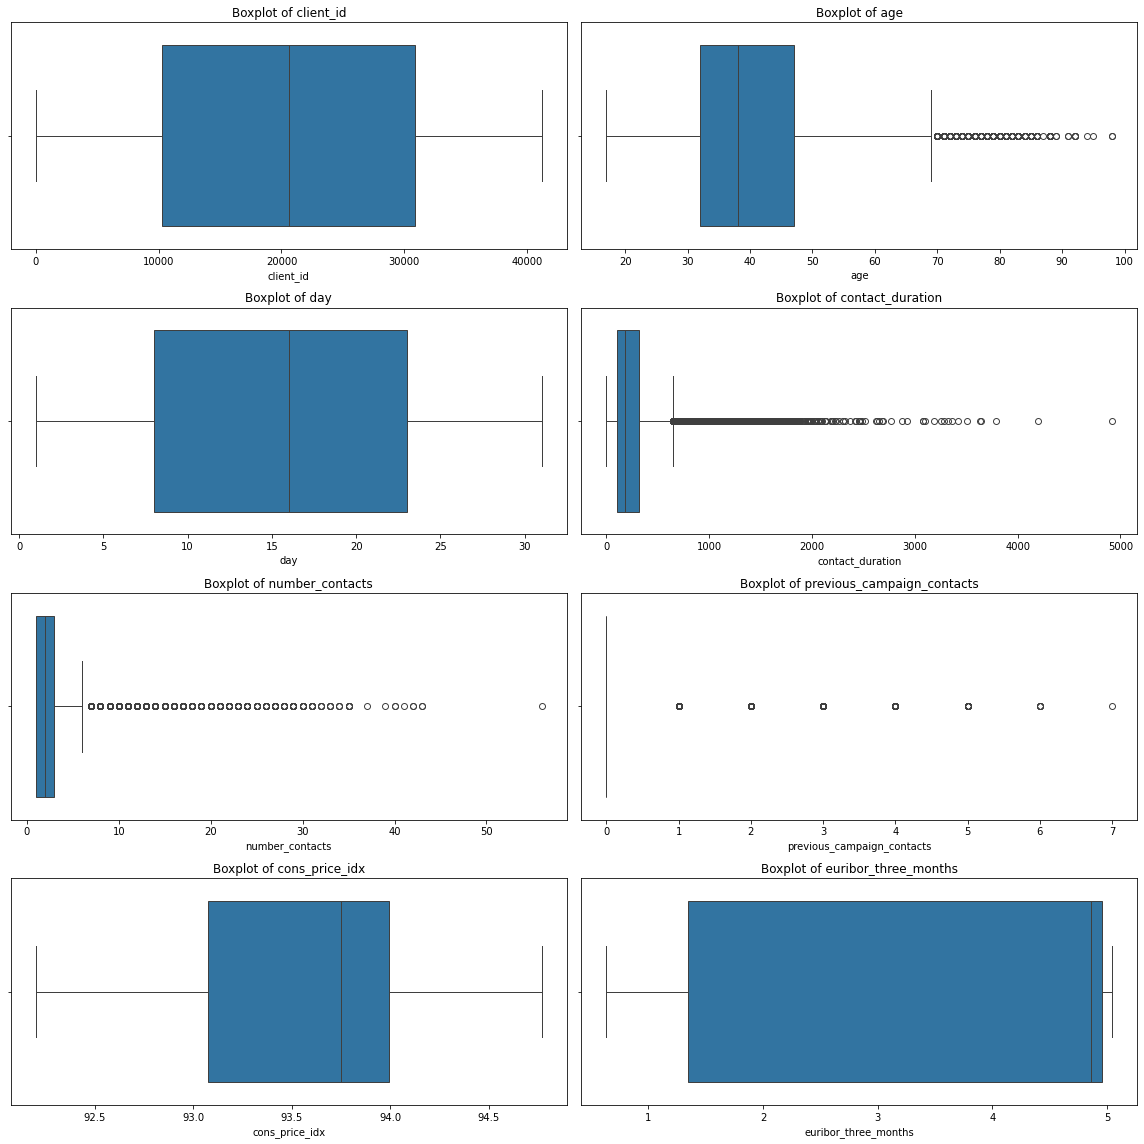

In [96]:
#Outlier Detection and Removal?? 
columns = df.select_dtypes(include=['int64','float64']).columns


# Create a 2x4 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Create a boxplot for each column
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

In [97]:
# Inconsistent Data
# object     
#Inconsistent Data: Fix formatting issues (e.g., capitalization, whitespace)

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.strip().str.lower()

In [98]:
# job > object > Change "." to "_"
df['job'] = df['job'].str.replace('.' , '_', regex=False)

# education > object > Change "." to "_" and "unknown" to np.NaN
df['education'] = df['education'].str.replace('.' , '_', regex=False)
df.loc[df['education'] == "unknown",'education'] = np.NaN

In [99]:
#bool
for col in ["job", "education"]:
    print(col)
    print("--------------")
    print(df[col].value_counts())

job
--------------
admin_           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
education
--------------
university_degree      12168
high_school             9515
basic_9y                6045
professional_course     5243
basic_4y                4176
basic_6y                2292
illiterate                18
Name: education, dtype: int64


# 6. EDA (Exploratory Data Analysis)

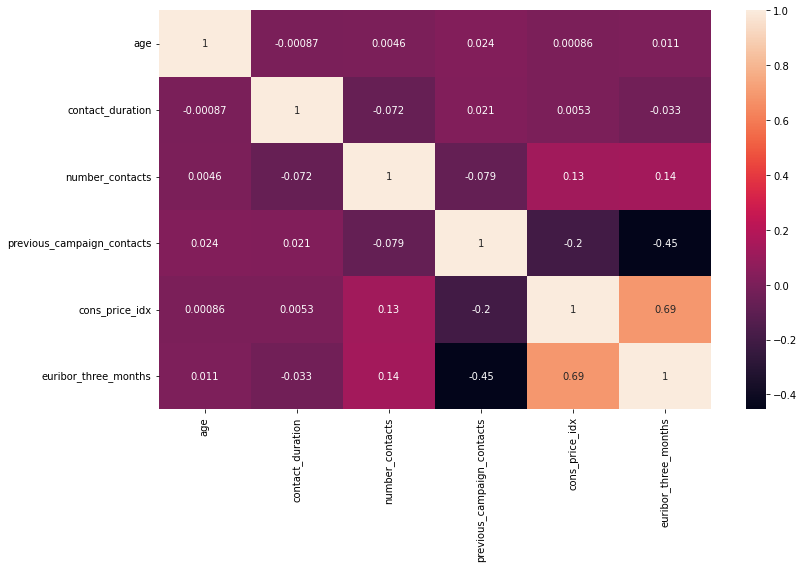

In [100]:
#Correlation analysis for numerical columns.
selected_columns = ['age', 'contact_duration','number_contacts','previous_campaign_contacts','cons_price_idx','euribor_three_months']
plt.figure(figsize=(12, 8))  # Adjust the size as needed (width, height)
sns.heatmap(df[selected_columns].corr(), annot=True)
plt.tight_layout()
plt.show()

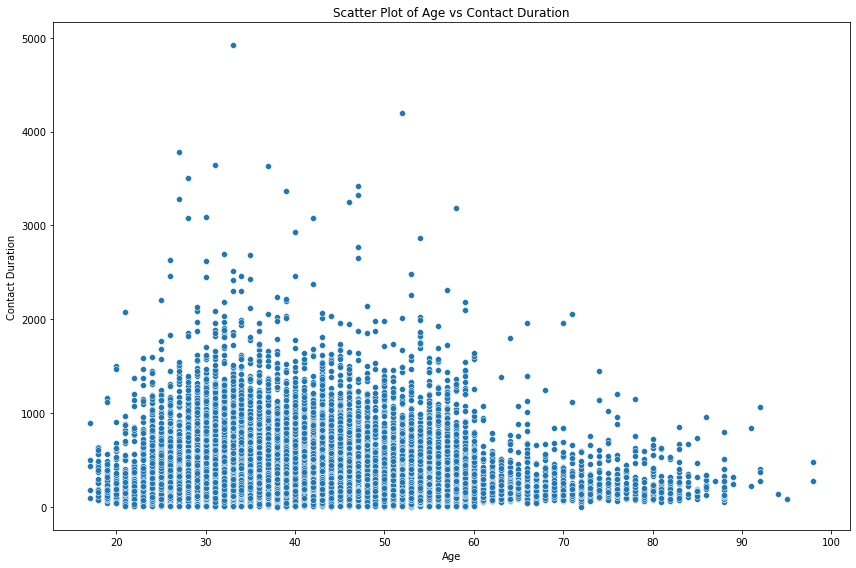

In [101]:
# Scatter Plot of Age vs Contact Duration
plt.figure(figsize=(12, 8)) 
sns.scatterplot(x='age', y='contact_duration', data=df)

# Set the title and labels
plt.title("Scatter Plot of Age vs Contact Duration")
plt.xlabel("Age")
plt.ylabel("Contact Duration")

# Show the plot
plt.tight_layout()
plt.show()


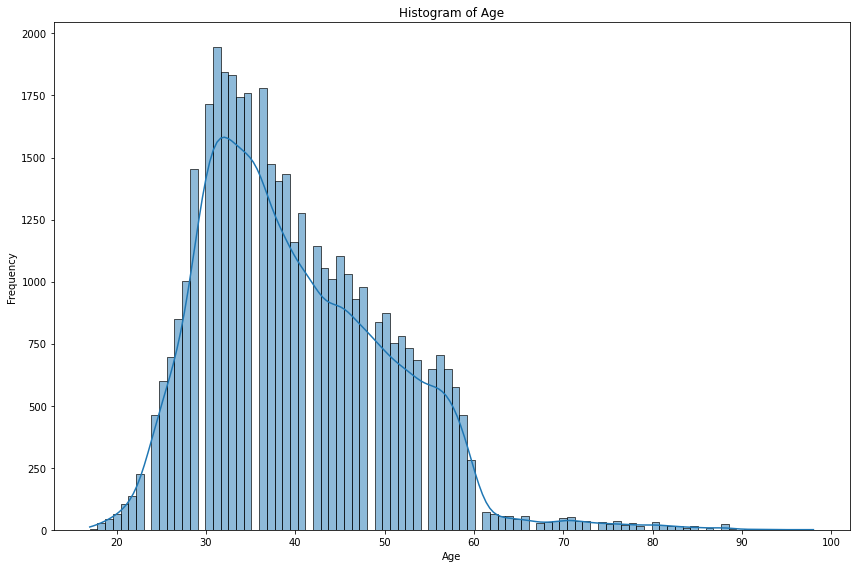

In [102]:
# Histogram of Age
plt.figure(figsize=(12, 8)) 
sns.histplot(df['age'], kde=True)  # kde=True adds a Kernel Density Estimate curve

# Set the title and labels
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Show the plot
plt.tight_layout()
plt.show()

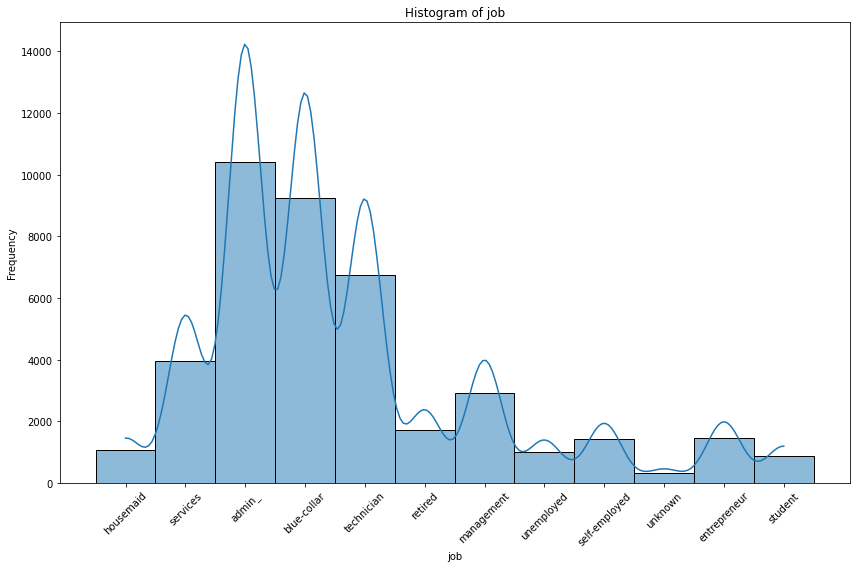

In [103]:
# Histogram of job
plt.figure(figsize=(12, 8)) 
sns.histplot(df['job'], kde=True)  # kde=True adds a Kernel Density Estimate curve

# Set the title and labels
plt.title("Histogram of job")
plt.xlabel("job")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

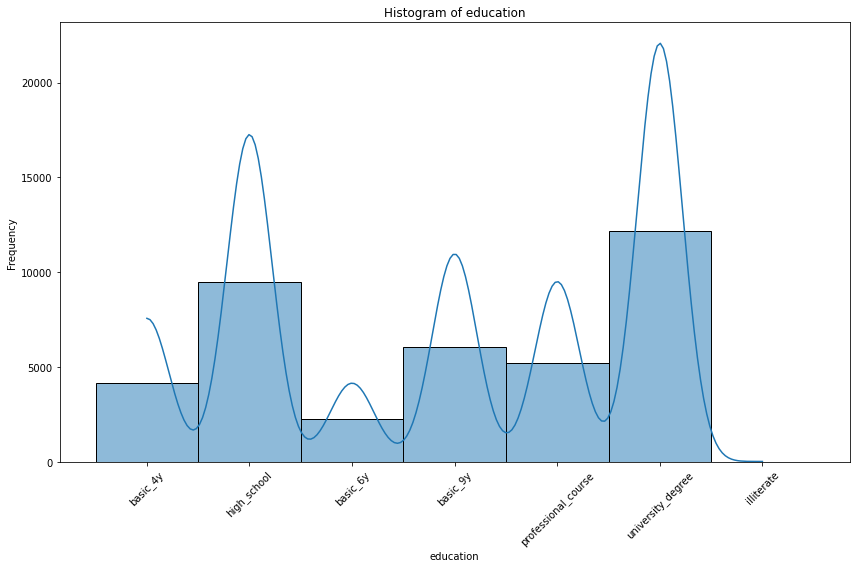

In [104]:
# Histogram of education
plt.figure(figsize=(12, 8)) 
sns.histplot(df['education'], kde=True)  # kde=True adds a Kernel Density Estimate curve

# Set the title and labels
plt.title("Histogram of education")
plt.xlabel("education")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()

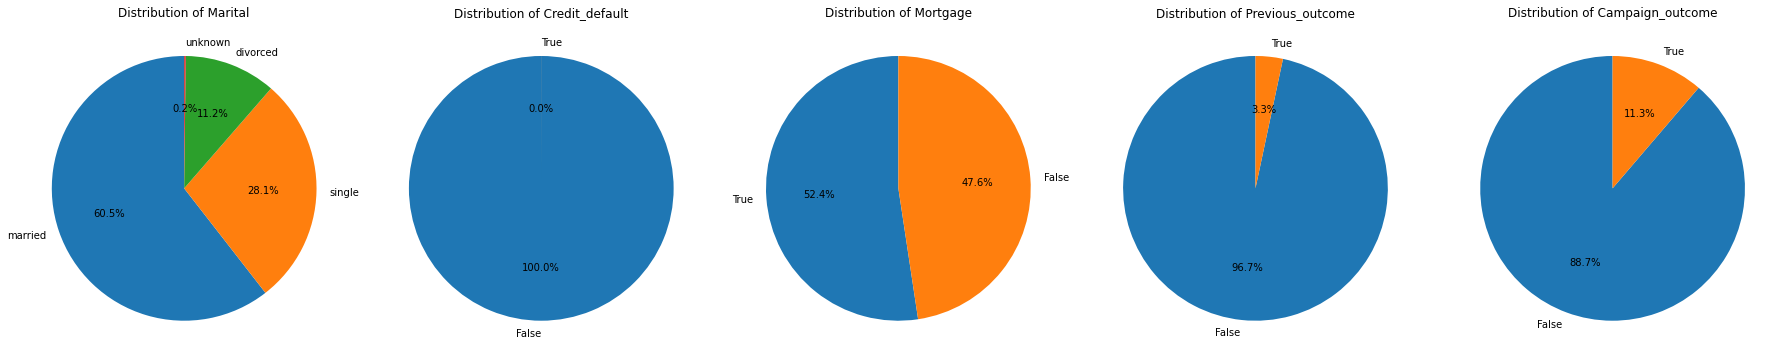

In [105]:
columns  = ['marital','credit_default','mortgage','previous_outcome','campaign_outcome']
fig, axes = plt.subplots(1, 5, figsize=(25, 8))  # Adjust the figsize for better spacing

# Loop through the columns and create a pie chart for each
for ax, column in zip(axes, columns):
    # Count the occurrences in each column
    data = df[column].value_counts()
    
    # Create the pie chart
    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribution of {column.capitalize()}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the pie charts
plt.show()

# 7. Save the Cleaned Data

In [106]:
df.to_csv('D:/DataEngineering/Projects/Clean Bank Marketing/data/bank_marketing_clean.csv', index=False)

# client.csv

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `age` | `integer` | Client's age in years | N/A |
| `job` | `object` | Client's type of job | Change `"."` to `"_"` |
| `marital` | `object` | Client's marital status | N/A |
| `education` | `object` | Client's level of education | Change `"."` to `"_"` and `"unknown"` to `np.NaN` |
| `credit_default` | `bool` | Whether the client's credit is in default | Convert to `boolean` data type:<br> `1` if `"yes"`, otherwise `0` |
| `mortgage` | `bool` | Whether the client has an existing mortgage (housing loan) | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0` |

In [110]:
df[['client_id', 'age', 'job', 'marital', 'education', 'credit_default','mortgage']].to_csv('D:/DataEngineering/Projects/Clean Bank Marketing/data/client.csv', index=False)

## `campaign.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `number_contacts` | `integer` | Number of contact attempts to the client in the current campaign | N/A |
| `contact_duration` | `integer` | Last contact duration in seconds | N/A |
| `previous_campaign_contacts` | `integer` | Number of contact attempts to the client in the previous campaign | N/A |
| `previous_outcome` | `bool` | Outcome of the previous campaign | Convert to boolean data type:<br> `1` if `"success"`, otherwise `0`. |
| `campaign_outcome` | `bool` | Outcome of the current campaign | Convert to boolean data type:<br> `1` if `"yes"`, otherwise `0`. |
| `last_contact_date` | `datetime` | Last date the client was contacted | Create from a combination of `day`, `month`, and a newly created `year` column (which should have a value of `2022`); <br> **Format =** `"YYYY-MM-DD"` |

In [111]:
df[['client_id', 'number_contacts', 'contact_duration','previous_campaign_contacts', 'previous_outcome','campaign_outcome', 'last_contact_date']].to_csv('D:/DataEngineering/Projects/Clean Bank Marketing/data/campaign.csv', index=False)

## `economics.csv`

| column | data type | description | cleaning requirements |
|--------|-----------|-------------|-----------------------|
| `client_id` | `integer` | Client ID | N/A |
| `cons_price_idx` | `float` | Consumer price index (monthly indicator) | N/A |
| `euribor_three_months` | `float` | Euro Interbank Offered Rate (euribor) three-month rate (daily indicator) | N/A |

In [112]:
df[['client_id', 'cons_price_idx', 'euribor_three_months']].to_csv('D:/DataEngineering/Projects/Clean Bank Marketing/data/economics.csv', index=False)

# 8. Conclusion

## Key steps performed:
### 1. Data Loading: The data was first loaded from the bank_marketing.csv file into a DataFrame for further processing.

### 2.Data Cleaning:

#### Client Data:
    Replaced . with _ in columns like job and education.
    Converted "unknown" in the education column to np.NaN.
    Transformed binary values (e.g., "yes" and "no") in columns like credit_default and mortgage to boolean (True/False).
    Ensured proper data types for each column (e.g., client_id and age as integers, job, marital, and education as objects).
#### Campaign Data:
    Correctly formatted the previous_outcome and campaign_outcome columns into boolean values.
    Created a last_contact_date column by combining day, month, and year columns and converting it to a datetime format.
#### Economics Data:
    Ensured that the cons_price_idx and euribor_three_months columns are formatted as floats.
### 3.Data Splitting:

    The cleaned data was then split into three separate CSV files: client.csv, campaign.csv, and economics.csv, each containing the relevant columns and correctly formatted data.
### 4.Saving the Cleaned Data: The final cleaned data was saved into three CSV files:

    client.csv
    campaign.csv
    economics.csv
## Final Structure:
- client.csv contains client-specific information such as ID, age, job type, marital status, education, credit defaults, and mortgage information.
- campaign.csv contains information related to the campaign, such as the number of contacts made, contact duration, campaign outcomes, and the last contact date.
- economics.csv contains economic indicators related to the clients, such as the consumer price index and euribor rate.